In [28]:
import sys
from PyQt5.QtWidgets import QApplication, QWidget, QLabel, QMainWindow
from PyQt5.QtCore import Qt

In [2]:
# Subclass QMainWindow to customise your application's main window
class MainWindow(QMainWindow):

    def __init__(self, *args, **kwargs):
        super(MainWindow, self).__init__(*args, **kwargs)

        self.setWindowTitle("My Awesome App")

        label = QLabel("This is a PyQt5 window!")

        # The `Qt` namespace has a lot of attributes to customise
        # widgets. See: http://doc.qt.io/qt-5/qt.html
        label.setAlignment(Qt.AlignCenter)

        # Set the central widget of the Window. Widget will expand
        # to take up all the space in the window by default.
        self.setCentralWidget(label)

In [2]:
class MainWindow(QMainWindow):

    def __init__(self, *args, **kwargs):
        super(MainWindow, self).__init__(*args, **kwargs)
        
        # SIGNAL: The connected function will be called whenever the window
        # title is changed. The new title will be passed to the function.
#         self.windowTitleChanged.connect(self.onWindowTitleChange)

        # SIGNAL: The connected function will be called whenever the window
        # title is changed. The new title is discarded in the lambda and the
        # function is called without parameters.
#         self.windowTitleChanged.connect(lambda x: self.my_custom_fn())

        # SIGNAL: The connected function will be called whenever the window
        # title is changed. The new title is passed to the function
        # and replaces the default parameter
        self.windowTitleChanged.connect(lambda x: self.my_custom_fn(x))

        # SIGNAL: The connected function will be called whenever the window
        # title is changed. The new title is passed to the function
        # and replaces the default parameter. Extra data is passed from
        # within the lambda.
#         self.windowTitleChanged.connect(lambda x: self.my_custom_fn(x, 25))
        
        # This sets the window title which will trigger all the above signals
        # sending the new title to the attached functions or lambdas as the
        # first parameter.
        self.setWindowTitle("My Awesome App")
        
        label = QLabel("THIS IS AWESOME!!!")
        label.setAlignment(Qt.AlignCenter)

        self.setCentralWidget(label)
        
        
    # SLOT: This accepts a string, e.g. the window title, and prints it
    def onWindowTitleChange(self, s):
        print(s)

    # SLOT: This has default parameters and can be called without a value
    def my_custom_fn(self, a="HELLLO!", b=5):
        print(a, b)

In [3]:
app = QApplication(sys.argv)

window = MainWindow()
window.show() # IMPORTANT!!!!! Windows are hidden by default.

# Start the event loop.
app.exec_()

My Awesome App 5


0

In [1]:
from PyQt5.QtWidgets import *
from PyQt5.QtCore import *
from PyQt5.QtGui import *

# Only needed for access to command line arguments
import sys

class MainWindow(QMainWindow):
    def __init__(self, *args, **kwargs):
        super(MainWindow, self).__init__(*args, **kwargs)

        self.setWindowTitle("My Awesome App")

        widget = QCheckBox()
        widget.setCheckState(Qt.Checked)

        # For tristate: widget.setCheckState(Qt.PartiallyChecked)
        # Or: widget.setTriState(True)
        widget.stateChanged.connect(self.show_state)
        
        self.setCentralWidget(widget)
        
        
    def show_state(self, s):
        print(s == Qt.Checked)
        print(s)

# You need one (and only one) QApplication instance per application.
# Pass in sys.argv to allow command line arguments for your app.
# If you know you won't use command line arguments QApplication([]) works too.
app = QApplication(sys.argv)

window = MainWindow()
window.show() # IMPORTANT!!!!! Windows are hidden by default.

# Start the event loop.
app.exec_()


# Your application won't reach here until you exit and the event 
# loop has stopped.

False
0
True
2
False
0


0

In [4]:
from PyQt5.QtWidgets import *
from PyQt5.QtCore import *
from PyQt5.QtGui import *
import sys

class MainWindow(QMainWindow):

    def __init__(self, *args, **kwargs):
        super(MainWindow, self).__init__(*args, **kwargs)
        
        self.setWindowTitle("My Awesome App")
        
        widget = QComboBox()
        widget.addItems(["One", "Two", "Three"])

        # The default signal from currentIndexChanged sends the index
        widget.currentIndexChanged.connect( self.index_changed )
        
        # The same signal can send a text string
        widget.currentIndexChanged[str].connect( self.text_changed )

        self.setCentralWidget(widget)


    def index_changed(self, i): # i is an int
        print(i)
        
    def text_changed(self, s): # s is a str
        print(s)

app = QApplication(sys.argv)
window = MainWindow()
window.show()

app.exec_()

2
Three
1
Two


0

# Main Section

In [53]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4 * 4 * 50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4 * 4 * 50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
    
def train(args, model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % args["log_interval"] == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def test(args, model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
def main(batch_size = 64, test_batch_size = 1000, epochs = 10, learning_rate = 0.01, momentum = 0.5, \
         no_cuda = True, seed = 1, log_interval = 10, save_model = True):
    # Training settings
    args = {}
    args["batch_size"] = batch_size 
    # 'input batch size for training (default: 64)')
    args["test_batch_size"] = test_batch_size
    # 'input batch size for testing (default: 1000)')
    args["epochs"] = epochs
    # 'number of epochs to train (default: 10)')
    args["lr"] = learning_rate
    # 'learning rate (default: 0.01)')
    args["momentum"] = momentum
    # 'SGD momentum (default: 0.5)')
    args["no_cuda"] = no_cuda
    # 'disables CUDA training')
    args["seed"] = seed
    # 'random seed (default: 1)')
    args["log_interval"] = log_interval
    # 'how many batches to wait before logging training status')
    args["save_model"] = save_model
    # 'For Saving the current Model')
    
    use_cuda = not args["no_cuda"] and torch.cuda.is_available()

    torch.manual_seed(args["seed"])

    device = torch.device("cuda" if use_cuda else "cpu")

    kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train = True, download = True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size = args["batch_size"], shuffle = True, **kwargs)
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train = False, transform = transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size = args["test_batch_size"], shuffle = True, **kwargs)

    model = Net().to(device)
    
    optimizer = optim.SGD(model.parameters(), lr = args["lr"], momentum = args["momentum"])

    for epoch in range(1, args["epochs"] + 1):
        train(args, model, device, train_loader, optimizer, epoch)
        test(args, model, device, test_loader)

    if args["save_model"]:
        torch.save(model.state_dict(), "mnist_cnn.pt")


if __name__ == '__main__':
    main()

In [4]:
net = Net()
net.load_state_dict(torch.load("mnist_cnn.pt"))

<All keys matched successfully>

In [5]:
test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train = False, transform = transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size = 1, shuffle = True)

dataiter = iter(test_loader)

In [6]:
data, target = dataiter.next()
data.shape

torch.Size([1, 1, 28, 28])

In [55]:
torch.from_numpy(tmp.numpy())

tensor([[-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242, -0.4242,
         -0.4242, -0.4242, -0.4242, -0.4242, -0.4242

In [42]:
net(tmp.unsqueeze(0).unsqueeze(0))

tensor([[-2.2117e+01, -2.7429e+01, -2.8117e+01, -1.1735e+01, -2.7601e+01,
         -1.1444e-05, -1.8517e+01, -3.2457e+01, -1.2605e+01, -1.7218e+01]],
       grad_fn=<LogSoftmaxBackward>)

In [56]:
# for i in range(100):
#     data, target = dataiter.next()
#     data = data.numpy().squeeze()
#     plt.imsave(arr = data, fname = "TestImages/{}-{:02}.png".format(target.item(), i), cmap="gray")

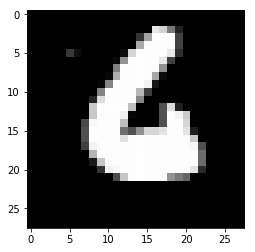

In [45]:
import matplotlib.pyplot as plt
plt.imshow(data.numpy().squeeze(), cmap="gray")

In [138]:
net(data).argmax()

tensor(0)

In [ ]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5, 1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4 * 4 * 50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4 * 4 * 50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

import sys, PyQt5
from PyQt5.QtWidgets import *
from PyQt5.QtCore import *
from PyQt5.QtGui import *
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import os

class MainWindow(QMainWindow):

    def __init__(self, path = "mnist_cnn.pt"):
        super(MainWindow, self).__init__()
        
        self.model = Net()
        self.model.load_state_dict(torch.load(path))
        
        self.initUI()
        
    def onMyToolBarButtonClick(self, s):
        options = QFileDialog.Options()
        options |= QFileDialog.DontUseNativeDialog
        fileName, _ = QFileDialog.getOpenFileName(self, "QFileDialog.getOpenFileName()", "", "All Files (*);;PNG (*.png)", options=options)
        
        if fileName:
            try:
                self.img = mpimg.imread(fileName) 
                self.img = torch.from_numpy(self.img[:, :, 0]).unsqueeze(0).unsqueeze(0)
                
                pixmap = QPixmap(fileName)
                pixmap = pixmap.scaled(self.img_label.width(), self.img_label.height())
                
                self.img_label.setPixmap(pixmap)
                
                prediction_digit = self.model(self.img).argmax()
                output_str = "Prediction of {}: {}".format(os.path.basename(fileName), prediction_digit)
                print(output_str)
                self.digit_label.setText(output_str)
                
            except Exception as e:
                print("Error uploading the file: {}", e)
            
    def initUI(self):
        """initialize UI settings"""
        
        self.H, self.W = 600, 600
        self.setWindowTitle("Simple Digit Recognition")
        self.setWindowIcon(QIcon("icons/trial.ico"))
        self.resize(self.W, self.H)
        self.moveCenter()
        
        layout = QVBoxLayout()
        
        self.upload_btn = QPushButton(QIcon("icons/filesave.png"), "Upload Image")
        self.upload_btn.clicked.connect(self.onMyToolBarButtonClick)
        self.upload_btn.setFixedHeight(50)
        
        layout.addWidget(self.upload_btn)
        
        self.img_label = QLabel(self)
        self.img_label.setFixedHeight(400)
        layout.addWidget(self.img_label)
            
        self.digit_label = QLabel(self)
        self.digit_label.setFont(QFont('Arial', 32))

        layout.addWidget(self.digit_label)
        
        widget = QWidget()
        widget.setLayout(layout)
        self.setCentralWidget(widget)
        
    def moveCenter(self):
        """make the window to be located at the center of desktop"""
        qr = self.frameGeometry()
        cp = QDesktopWidget().availableGeometry().center()
        qr.moveCenter(cp)
        self.move(qr.topLeft())
        
def main():
    app = QApplication(sys.argv)
    window = MainWindow()
    window.show()

    app.exec_()
    
if __name__ == '__main__':
    main()

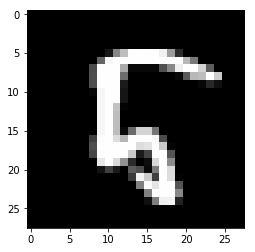

In [57]:
img = mpimg.imread("TestImages/5-32.png")
plt.imshow(img[:, :, 0], cmap="gray")

In [ ]:
from __future__ import print_function
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import sys, PyQt5
from PyQt5.QtWidgets import *
from PyQt5.QtCore import *
from PyQt5.QtGui import *
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import os

from train import Net

class MainWindow(QMainWindow):

    def __init__(self, path = "mnist_cnn.pt"):
        super(MainWindow, self).__init__()
        
        self.model = Net()
        self.model.load_state_dict(torch.load(path))
        
        self.initUI()
        
    def onMyToolBarButtonClick(self, s):
        options = QFileDialog.Options()
        options |= QFileDialog.DontUseNativeDialog
        fileName, _ = QFileDialog.getOpenFileName(self, "QFileDialog.getOpenFileName()", "", "All Files (*);;PNG (*.png)", options=options)
        
        if fileName:
            try:
                self.img = mpimg.imread(fileName) 
                self.img = torch.from_numpy(self.img[:, :, 0]).unsqueeze(0).unsqueeze(0)
                
                pixmap = QPixmap(fileName)
                pixmap = pixmap.scaled(self.img_label.width(), self.img_label.height())
                
                self.img_label.setPixmap(pixmap)
                
                prediction_digit = self.model(self.img).argmax()
                output_str = "Prediction of {}: {}".format(os.path.basename(fileName), prediction_digit)
                print(output_str)
                self.digit_label.setText(output_str)
                
            except Exception as e:
                print("Error uploading the file: {}", e)
            
    def initUI(self):
        """initialize UI settings"""
        
        self.H, self.W = 600, 600
        self.setWindowTitle("Simple Digit Recognition")
        self.setWindowIcon(QIcon("icons/trial.ico"))
        self.resize(self.W, self.H)
        self.moveCenter()
        
        layout = QVBoxLayout()
        
        self.upload_btn = QPushButton(QIcon("icons/filesave.png"), "Upload Image")
        self.upload_btn.clicked.connect(self.onMyToolBarButtonClick)
        self.upload_btn.setFixedHeight(50)
        
        layout.addWidget(self.upload_btn)
        
        self.img_label = QLabel(self)
        self.img_label.setFixedHeight(400)
        layout.addWidget(self.img_label)
            
        self.digit_label = QLabel(self)
        self.digit_label.setFont(QFont('Arial', 32))

        layout.addWidget(self.digit_label)
        
        widget = QWidget()
        widget.setLayout(layout)
        self.setCentralWidget(widget)
        
    def moveCenter(self):
        """make the window to be located at the center of desktop"""
        qr = self.frameGeometry()
        cp = QDesktopWidget().availableGeometry().center()
        qr.moveCenter(cp)
        self.move(qr.topLeft())
        
def main():
    app = QApplication(sys.argv)
    window = MainWindow()
    window.show()

    app.exec_()
    
if __name__ == '__main__':
    main()